In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from clean_data import extract_feature_per_person
from hmm_twolayer_model import *
from gmm_para_crossval import search_nmix_gmm_crossval

In [2]:
def run_model_per_person(person):
    # Feature extraction
    train_reduced, test_reduced, train_labels, test_labels, train_len, test_len = \
        extract_feature_per_person(person)
    n_mix, max_f1 = search_nmix_gmm_crossval(train_reduced, train_labels, train_len, 6)
    # Use chosen gmm parameters to fit model on all training data
    hmm_top, sub_mcs, gmms = hmm_twolayer_train(train_reduced, train_labels, train_len, n_mix)
    test_states, predicted_labels = hmm_twolayer_predict(hmm_top, sub_mcs, gmms, test_reduced, test_len)
    
    # Evaluate the weighted F1 score
    true_labels = np.maximum(0, test_labels - 100)
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    print "Weighted F1 score: ", f1
    # Evaluate accuracy
    print "Accuracy: ", np.sum(true_labels == predicted_labels) / float(len(true_labels))
    
    # Make precision recall table for each label
    precision, recall , _, _ = precision_recall_fscore_support(true_labels, predicted_labels, average=None, labels=[0, 1, 2, 3, 4, 5])
    pr_table = pd.DataFrame(index=range(0, 6), columns=['precision', 'recall'])
    for i in range(0, 6):
        pr_table.iloc[i, :] = [precision[i], recall[i]]
    print pr_table
    
    # Plot predicted labels and true labels
    plt.plot(predicted_labels, '.', label="estimated label")
    plt.plot(true_labels, '-', label="true label")
    plt.xlabel('time step')
    plt.ylabel('Activity label')
    plt.title("ADL4, ADL5 -- person %d" % person)
    plt.legend(loc=9, bbox_to_anchor=(1.2, 1))
    plt.show()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
hmm/gauss_distr.py:245: UserWarning: Not enough data for GaussDistr object 3, forcing std to zero
  % i )
hmm/gauss_distr.py:245: UserWarning: Not enough data for GaussDistr object 4, forcing std to zero
  % i )
hmm/gauss_distr.py:245: UserWarning: Not enough data for GaussDistr object 6, forcing std to zero
  % i )


Weighted F1 score:  0.632431805943
Accuracy:  0.642059868087
   precision     recall
0  0.4817961  0.8630435
1  0.9278132  0.9776286
2  0.3411371  0.2111801
3   0.963141  0.6244156
4  0.6277738  0.8344434
5  0.6504723  0.6912046


hmm/gauss_distr.py:245: UserWarning: Not enough data for GaussDistr object 1, forcing std to zero
  % i )


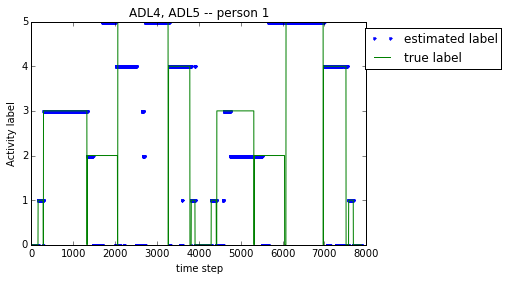

In [3]:
run_model_per_person(1)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
hmm/gauss_distr.py:245: UserWarning: Not enough data for GaussDistr object 2, forcing std to zero
  % i )
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
hmm/gaussmix_distr.py:173: UserWarning: Too few data for 5-th GaussDistr
  warnings.warn("Too few data for %d-th GaussDistr" % i)
hmm/gaussmix_distr.py:173: UserWarning: Too few data for 6-th GaussDistr
  warnings.warn("Too few data for %d-th GaussDistr" % i)
hmm/gaussmix_distr.py:173: UserWarning: Too few data for 7-th GaussDistr
  warnings.warn("Too few data for %d-th GaussDistr" % i)
hmm/gaussmix_distr.py:173: UserWarni

Weighted F1 score:  0.833656908224
Accuracy:  0.838805600297
   precision     recall
0   0.894027  0.7400319
1  0.9270315  0.9824253
2   0.688747  0.9421397
3  0.9850645  0.9301282
4   0.765748  0.4512761
5  0.8072591  0.8865979


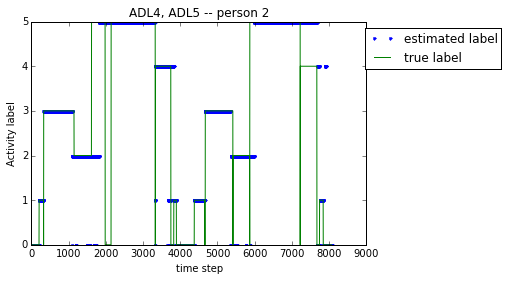

In [4]:
run_model_per_person(2)

Weighted F1 score:  0.808938332511
Accuracy:  0.810515433466
   precision     recall
0  0.8957529  0.5296804
1  0.9358372  0.8616715
2  0.5700809  0.9976415
3   0.768595  0.9987366
4  0.9643766  0.8257081
5   0.964258  0.6700864


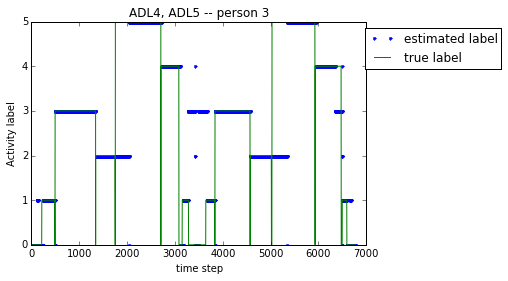

In [5]:
run_model_per_person(3)

Weighted F1 score:  0.776851715207
Accuracy:  0.761413620507
   precision     recall
0   0.891054  0.6063894
1  0.6030534  0.9783282
2   0.398685  0.9694767
3  0.9702725  0.9407526
4          1  0.6827957
5  0.8286204  0.7048105


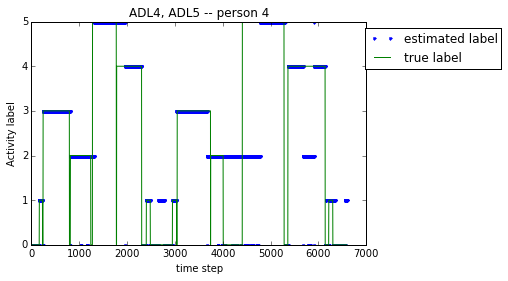

In [6]:
run_model_per_person(4)